# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

In [2]:
df.head(5)

,p1,p2
0,6.964692,7.943428
1,2.861393,5.099537
2,2.268515,0.974429
3,5.513148,4.474359
4,7.194690,8.938402


In [3]:
m_media = np.array([0.5, 0.5])
m_dif = np.array([-1, 1])
df['média'] = np.matmul(m_media, df[['p1', 'p2']].to_numpy().transpose())
df['diferença'] = np.matmul(m_dif, df[['p1', 'p2']].to_numpy().transpose())
df

,p1,p2,média,diferença
0,6.964692,7.943428,7.454060,0.978736
1,2.861393,5.099537,3.980465,2.238143
2,2.268515,0.974429,1.621472,-1.294085
3,5.513148,4.474359,4.993754,-1.038788
4,7.194690,8.938402,8.066546,1.743712
5,4.231065,3.433002,3.832033,-0.798063
6,9.807642,9.837325,9.822484,0.029683
7,6.848297,7.917613,7.382955,1.069316
8,4.809319,5.700025,5.254672,0.890706
9,3.921175,5.676061,4.798618,1.754886


In [4]:
corr1 = df[['p1', 'p2']].corr()
corr1

,p1,p2
p1,1.000000,0.895737
p2,0.895737,1.000000


In [10]:
#Calculando a correlacao
corr2 = df[['média', 'diferença']].corr()
corr2

,média,diferença
média,1.000000,0.133474
diferença,0.133474,1.000000


**Comentário:** A correlação entre a média e a diferença é positiva, mas relativamente baixa (0,133474). Isso sugere que, conforme a média dos dados aumenta, a diferença entre os valores também tende a aumentar, mas essa relação não é forte.

A baixa correlação indica que a média e a diferença não estão fortemente relacionadas. Ou seja, mudanças na média não explicam muito bem as mudanças na diferença.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [7]:
m_soma = np.array([1, 1])
df['soma'] = np.matmul(m_soma, df[['p1', 'p2']].to_numpy().transpose())
df

,p1,p2,média,diferença,soma
0,6.964692,7.943428,7.454060,0.978736,14.908120
1,2.861393,5.099537,3.980465,2.238143,7.960930
2,2.268515,0.974429,1.621472,-1.294085,3.242944
3,5.513148,4.474359,4.993754,-1.038788,9.987507
4,7.194690,8.938402,8.066546,1.743712,16.133092
5,4.231065,3.433002,3.832033,-0.798063,7.664066
6,9.807642,9.837325,9.822484,0.029683,19.644967
7,6.848297,7.917613,7.382955,1.069316,14.765911
8,4.809319,5.700025,5.254672,0.890706,10.509344
9,3.921175,5.676061,4.798618,1.754886,9.597237


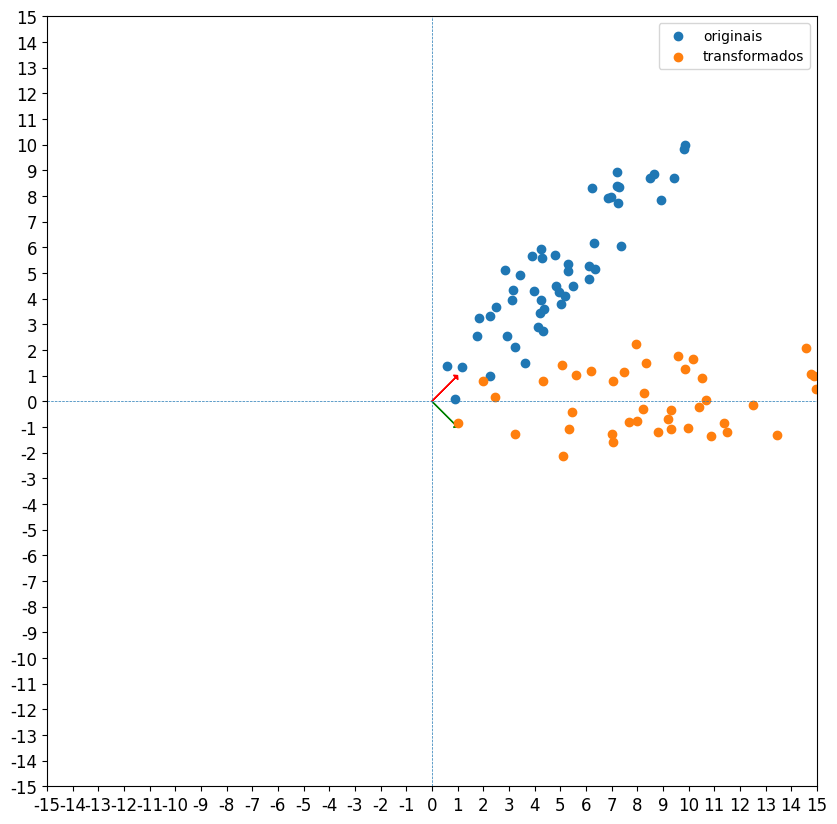

In [8]:
#Definindo figura e configurando eixos
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)

xmin = -15
xmax = 15
ymin = -15
ymax = 15

# ax.axis('equal')
ax.set_aspect('equal', 'box')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

lista_xticks = list(range(int(xmin), int(xmax)+1))
ticksx = ax.set_xticks(lista_xticks)
labelsx = ax.set_xticklabels(lista_xticks, fontsize='large')

lista_yticks = list(range(int(ymin), int(ymax)+1))
ticksy = ax.set_yticks(lista_yticks)
labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')

#Matriz de transformação
m = np.array([[ 1, 1],
              [ -1, 1]])

# Vetores coluna da matriz de transformação
ax.arrow(0, 0, m[0,0], m[1,0]
         , head_width=0.25
         , head_length=0.1
         , fc='g', ec='g',
         length_includes_head=True)

ax.arrow(0, 0, m[0,1], m[1,1]
         , head_width=0.25
         , head_length=0.1
         , fc='r', ec='r',
         length_includes_head=True)


#linhas horizontais e verticais de referência
ax.axvline(0, linewidth=.5, linestyle='--')
ax.axhline(0, linewidth=.5, linestyle='--')

#Transformação linear
df_rot = np.matmul(m, df[['p1', 'p2']].to_numpy().transpose())

# Plotar os dados originais
plt.scatter(df['p1'], df['p2'], label='originais')

# Plotar os dados transformados
plt.scatter(df_rot[0,:], df_rot[1,:], label='transformados')

#Legenda
plt.legend()


**Comentário:** Os pontos azuis estão mais dispersos ao longo de uma linha diagonal ascendente. Isso sugere que há uma forte correlação positiva entre as duas variáveis originais (p1 e p2).

Os pontos laranjas estão mais concentrados ao longo do eixo horizontal,
indicando que a transformação (média e diferença ou soma e diferença) resultou em uma redução da variação em uma das direções, provavelmente a diferença.